# Classificacao de Cancer com Arvores de Decisao

Vamos classificar tumores em benignos ou malignos, baseado-se em diversos atributos destes.

## Imports, Carga de Dados, etc

#### Imports

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

#### Carga dos dados

In [2]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

## Validacao Cruzada

### QUESTAO 01

Analisar a eficacia do classificador DecisionTreeClassifier com diferentes valores do parametro `max_depth` (profundidade maxima da arvore).

Plote um grafico de linha mostrando a acuracia para diferentes valores deste parametro.

A acuracia deve ser a media (mean) dos valores obtidos em uma validacao cruzada.

Execute a validacao cruzada atraves da funcao: `cross_val_score`, especificando `scoring='accuracy'` e um valor inteiro para `cv` (quantidade de folds). Exemplo: `cv=10`

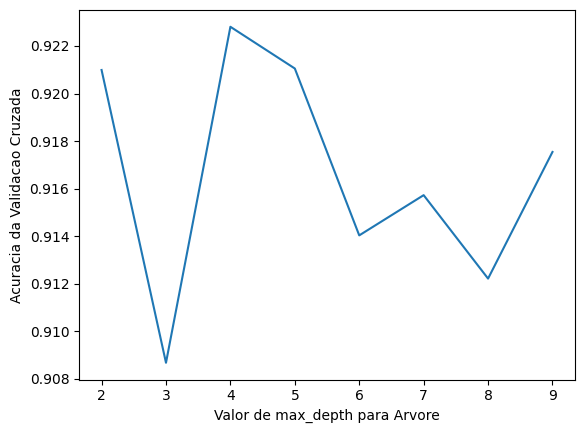

In [12]:
%matplotlib inline

# d variando de 2 a 9
d_range = range(2, 10)
mean_scores = []

for d in d_range:
    dtc = DecisionTreeClassifier(max_depth=d)
    accuracy = cross_val_score(dtc, X, y, cv=10, scoring="accuracy").mean()
    mean_scores.append(accuracy)

plt.plot(d_range, mean_scores)
plt.xlabel('Valor de max_depth para Arvore')
plt.ylabel('Acuracia da Validacao Cruzada')
plt.show()

### QUESTAO 02

Repita o experimento da questao anterior, porem, ao inves de especificar um valor inteiro para `cv`, especifique um separador personalizado.

O que vai mudar no codigo:

Antes do laco, instancie um objeto `StratifiedKFold` (equivalente ao KFold, porem, mantem um equilibrio na distribuicao das classes). Voce deve escolher os parametros.

`custom_cv = StratifiedKFold(....)`

O parametro `_cv_` do metodo `cross_val_score` deve ser especificado da seguinte maneira:

cross_val_score(..., cv=custom_cv, ...)

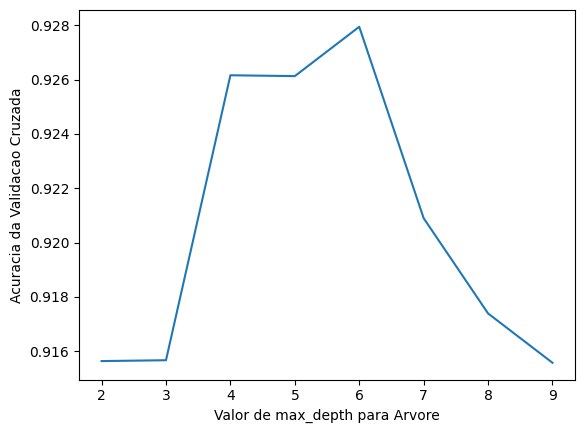

In [15]:
%matplotlib inline

# d variando de 2 a 9
d_range = range(2, 10)
mean_scores = []
custom_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=4312)

for d in d_range:
    dtc = DecisionTreeClassifier(max_depth=d)
    accuracy = cross_val_score(dtc, X, y, cv=custom_cv, scoring="accuracy").mean()
    mean_scores.append(accuracy)

plt.plot(d_range, mean_scores)
plt.xlabel('Valor de max_depth para Arvore')
plt.ylabel('Acuracia da Validacao Cruzada')
plt.show()

### QUESTAO 03

Reflita sobre as escolhas que voce faria com base nos resultados destes experimentos para discutirmos na aula.

Profundidas baixas resultam em viés alto e profundidade alta resulta em overfitting, por isso é ideal utilizar um max_deth intermediário que maximize a acurácia sem comprometer a generalização. E, sobre a validação cruzada, pode-se perceber que com StratifiedKFold conseguimos lidar melhor com classes desbalanceadas.